In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spotify_df_3 (1) (1).csv to spotify_df_3 (1) (1).csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['spotify_df_3 (1) (1).csv']))
df

,artist_name,track_name,track_id,artist_href,track_href,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,lil dicky,freaky friday (feat. chris brown),10Igtw8bSDyyFs7KIsKngZ,https://open.spotify.com/artist/1tqhsYv8yBBdwA...,https://open.spotify.com/track/10Igtw8bSDyyFs7...,comedy,0.755,0.599,8,-5.042,1,0.2240,0.14700,0.000000,0.1090,0.7550,133.123,216632
1,afroman,crazy rap (colt 45 & 2 zig zags),1ACZpHI5vZ5Ea4xGlkdGWM,https://open.spotify.com/artist/4Icvbp9RDt5aY2...,https://open.spotify.com/track/1ACZpHI5vZ5Ea4x...,comedy,0.927,0.367,9,-7.797,1,0.3820,0.32500,0.000000,0.1320,0.5760,99.053,328667
2,lil dicky,molly (feat. brendon urie of panic at the disco),0NBiC3zLXoBQXBjsbnbwJq,https://open.spotify.com/artist/1tqhsYv8yBBdwA...,https://open.spotify.com/track/0NBiC3zLXoBQXBj...,comedy,0.831,0.514,7,-6.695,1,0.0368,0.20300,0.000156,0.1150,0.3970,114.940,244340
3,lil dicky,$ave dat money (feat. fetty wap & rich homie q...,6AoYWCzsDls6c61Zp5qTuU,https://open.spotify.com/artist/1tqhsYv8yBBdwA...,https://open.spotify.com/track/6AoYWCzsDls6c61...,comedy,0.858,0.697,2,-5.361,1,0.2300,0.11400,0.000000,0.2240,0.3640,98.012,290836
4,lil dicky,professional rapper (feat. snoop dogg),1Ysc1uDZtf430TGavoS1j4,https://open.spotify.com/artist/1tqhsYv8yBBdwA...,https://open.spotify.com/track/1Ysc1uDZtf430TG...,comedy,0.685,0.621,11,-8.442,0,0.3610,0.43300,0.000000,0.6070,0.5380,128.906,353960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37950,zahid,biasa (feat viral),1ansTTR07mqQjnFDQNxvCN,https://open.spotify.com/artist/3ZGfDgL6ZUN6h5...,https://open.spotify.com/track/1ansTTR07mqQjnF...,malay,0.798,0.668,0,-5.902,1,0.0359,0.10000,0.000000,0.3540,0.8730,99.993,250600
37951,nomadic voice,pravasi,1eh1HgZiP3Hd5nn9zq6bfm,https://open.spotify.com/artist/1oze8SLXENyjFZ...,https://open.spotify.com/track/1eh1HgZiP3Hd5nn...,malay,0.755,0.543,8,-10.736,1,0.1610,0.08160,0.000000,0.0770,0.0568,100.090,176177
37952,san jaimt,thee,4gLd8UFqGv0ZdM8xizCE8U,https://open.spotify.com/artist/2BrfO48KSTebyO...,https://open.spotify.com/track/4gLd8UFqGv0ZdM8...,malay,0.649,0.800,4,-5.866,1,0.1690,0.52500,0.000000,0.0873,0.3810,159.933,240000
37953,street academics,pambaram - v3k remix,5oTGvHta44zs7IJvJ32hJA,https://open.spotify.com/artist/0LZRSRpEniupzK...,https://open.spotify.com/track/5oTGvHta44zs7IJ...,malay,0.643,0.677,11,-7.336,1,0.1440,0.00333,0.532000,0.0675,0.3580,180.049,197346


In [ ]:
target = df["genre_name"]
target_names = target.unique().tolist()
target_names

['comedy',
 'turkish',
 'afrobeat',
 'bluegrass',
 'black-metal',
 'indian',
 'deep-house',
 'chill',
 'alt-rock',
 'heavy-metal',
 'acoustic',
 'ambient',
 'grindcore',
 'idm',
 'dancehall',
 'forro',
 'emo',
 'anime',
 'chicago-house',
 'malay']

In [ ]:
data = df.drop(["artist_name", "track_name", "track_id", "artist_href", "track_href"], axis=1)
feature_names = data.columns
data.head()

NameError: ignored

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.25,random_state=0)

In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

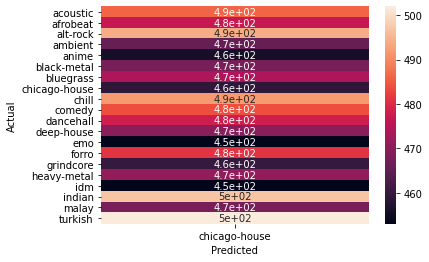

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.04837179892507114
